## Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

## Step 2: Loading Data

In [2]:
train_data = pd.read_csv('/kaggle/input/data-storm-5-0/train_kaggle.csv')
train_data.head()

/tmp/ipykernel_18/433442297.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/kaggle/input/data-storm-5-0/train_kaggle.csv')


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


### Set Customer ID as Index

In [3]:
train_data.set_index('Customer_ID',inplace=True)
train_data.index.name = None

In [4]:
train_data.head()

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
10493832.0,Kelaniya,1209.6,756.0,5292.0,4
10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
10513916.0,Wattala,2288.88,1481.04,9155.52,4
10334589.0,Wattala,2274.94,1739.66,9099.76,4
10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


## Step 3: Preprocessing Data

In [5]:
train_data.dtypes

outlet_city         object
luxury_sales        object
fresh_sales         object
dry_sales           object
cluster_catgeory    object
dtype: object

#### Change the numeric data types

In [6]:
train_data['luxury_sales'] = pd.to_numeric(train_data['luxury_sales'], errors='coerce')
train_data['fresh_sales'] = pd.to_numeric(train_data['fresh_sales'], errors='coerce')
train_data['dry_sales'] = pd.to_numeric(train_data['dry_sales'], errors='coerce')
train_data['cluster_catgeory'] = pd.to_numeric(train_data['cluster_catgeory'], errors='coerce')

In [7]:
train_data.dtypes

outlet_city          object
luxury_sales        float64
fresh_sales         float64
dry_sales           float64
cluster_catgeory    float64
dtype: object

### Dealing with missing values

In [8]:
train_data.isnull().sum()

outlet_city          2
luxury_sales        45
fresh_sales         50
dry_sales           38
cluster_catgeory     2
dtype: int64

In [9]:
train_data.shape

(774155, 5)

#### Since shape is too large comparing to missing values, we can drop those

In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.shape

(774040, 5)

#### Drop duplicates as well

In [12]:
train_data.drop_duplicates(inplace=True)

In [13]:
train_data.shape

(771100, 5)

In [14]:
train_data['outlet_city'].value_counts().sort_index()

outlet_city
Batticaloa                40866
Colombo                   40889
Dehiwala-Mount Lavinia    36676
Galle                     40885
Gampaha                   40116
Homagama                  36479
Jaffna                    40548
Kaduwela                  36502
Kalmunai                  40590
Kandy                     40393
Katunayake                40519
Kelaniya                  35818
Kotte                     36633
Moratuwa                  36248
Negombo                   40558
Nuwara Eliya              36926
Panadura                  36552
Peliyagoda                36986
Trincomalee               40398
Wattala                   36518
Name: count, dtype: int64

### Remove outlier classes 

In [15]:
train_data['cluster_catgeory'].value_counts()

cluster_catgeory
1.0      188297
4.0      171485
6.0      168624
2.0      154355
3.0       48842
5.0       39492
99.0          1
95.0          1
98.0          1
100.0         1
89.0          1
Name: count, dtype: int64

In [16]:
train_data.drop(train_data[train_data['cluster_catgeory']==99.0].index,inplace=True)
train_data.drop(train_data[train_data['cluster_catgeory']==95.0].index,inplace=True)
train_data.drop(train_data[train_data['cluster_catgeory']==98.0].index,inplace=True)
train_data.drop(train_data[train_data['cluster_catgeory']==100.0].index,inplace=True)
train_data.drop(train_data[train_data['cluster_catgeory']==89.0].index,inplace=True)

In [17]:
train_data['cluster_catgeory'].value_counts().sort_index()

cluster_catgeory
1.0    188297
2.0    154355
3.0     48842
4.0    171485
5.0     39492
6.0    168624
Name: count, dtype: int64

## Step 4: Feature Engineering

### Handle categorical variables

In [18]:
train_data_f = pd.get_dummies(train_data)
train_data_f.head()

,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,outlet_city_Homagama,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
10493832.0,1209.60,756.00,5292.00,4.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
10178643.0,1590.12,1060.08,6007.12,1.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
10513916.0,2288.88,1481.04,9155.52,4.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10334589.0,2274.94,1739.66,9099.76,4.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10458365.0,2345.49,2069.55,9243.99,4.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [19]:
train_data_f = train_data_f.astype('float64')
train_data_f.head()

,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,outlet_city_Homagama,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
10493832.0,1209.60,756.00,5292.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10178643.0,1590.12,1060.08,6007.12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10513916.0,2288.88,1481.04,9155.52,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10334589.0,2274.94,1739.66,9099.76,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10458365.0,2345.49,2069.55,9243.99,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Declare Independent and Dependent Variables

In [20]:
Y = train_data_f['cluster_catgeory'].to_numpy()
Y

array([4., 1., 4., ..., 3., 3., 3.])

### Scale the Data

In [21]:
X = train_data_f.drop('cluster_catgeory',axis=1)
transform = preprocessing.StandardScaler()
X[['luxury_sales','fresh_sales','dry_sales']] = transform.fit_transform(X[['luxury_sales','fresh_sales','dry_sales']])
X

,luxury_sales,fresh_sales,dry_sales,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,outlet_city_Homagama,outlet_city_Jaffna,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
10493832.0,-0.709602,-1.101678,0.180826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10178643.0,-0.330909,-1.010483,0.390581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10513916.0,0.364497,-0.884236,1.314052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10334589.0,0.350624,-0.806674,1.297697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10458365.0,0.420835,-0.707739,1.340002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10197979.0,1.961315,-0.160758,-0.359916,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10494575.0,4.153203,0.338460,0.469198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10565682.0,3.183440,0.117181,-0.001753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10351977.0,4.368067,0.564519,0.371035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split the data or find model accuracy

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

### OneVsRest Multiclass Classification with Logistic Regression

In [23]:
lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(X_train,Y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [24]:
Y_ovr = ovr.predict(X_test)

In [25]:
accuracyOvr = accuracy_score(Y_test,Y_ovr)
accuracyOvr

0.9997989871546308

In [26]:
print(classification_report(Y_test,Y_ovr))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     37801
         2.0       1.00      1.00      1.00     30637
         3.0       1.00      1.00      1.00      9960
         4.0       1.00      1.00      1.00     34229
         5.0       1.00      1.00      1.00      7840
         6.0       1.00      1.00      1.00     33752

    accuracy                           1.00    154219
   macro avg       1.00      1.00      1.00    154219
weighted avg       1.00      1.00      1.00    154219



### OneVsOne Multiclass Classification with SVM

In [27]:
svm = SVC()
ovo = OneVsOneClassifier(svm)
ovo.fit(X_train,Y_train)

OneVsOneClassifier(estimator=SVC())

In [28]:
Y_ovo = ovo.predict(X_test)

In [29]:
accuracyOvo = accuracy_score(Y_test,Y_ovo)
accuracyOvo

0.9997989871546308

In [30]:
print(classification_report(Y_test,Y_ovo))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     37801
         2.0       1.00      1.00      1.00     30637
         3.0       1.00      1.00      1.00      9960
         4.0       1.00      1.00      1.00     34229
         5.0       1.00      1.00      1.00      7840
         6.0       1.00      1.00      1.00     33752

    accuracy                           1.00    154219
   macro avg       1.00      1.00      1.00    154219
weighted avg       1.00      1.00      1.00    154219



### Both methods gave same accuracy

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


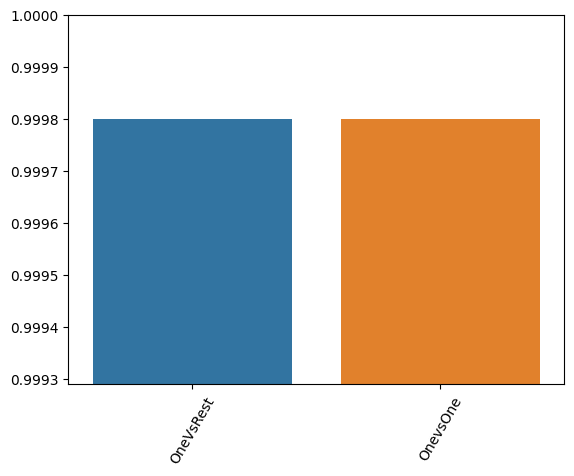

In [31]:
accuracies = [accuracyOvr,accuracyOvo]
models = ['OneVsRest','OnevsOne']

ax = sns.barplot(x=models,y=accuracies)
plt.xticks(rotation=60)
plt.ylim(0.99929,1)
plt.show()

## Step 5: Load New Data

In [32]:
test_data = pd.read_csv('/kaggle/input/data-storm-5-0/test_kaggle.csv')
test_data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24


In [33]:
test_data.set_index('Customer_ID',inplace=True)
test_data.index.name = None

### Handle Missing Values

In [34]:
test_data['luxury_sales'] = pd.to_numeric(test_data['luxury_sales'], errors='coerce')
test_data['fresh_sales'] = pd.to_numeric(test_data['fresh_sales'], errors='coerce')
test_data['dry_sales'] = pd.to_numeric(test_data['dry_sales'], errors='coerce')

In [35]:
test_data.isnull().sum()

outlet_city     0
luxury_sales    2
fresh_sales     1
dry_sales       1
dtype: int64

### Used the mean to fill missing values

In [36]:
test_data['luxury_sales'] = test_data['luxury_sales'].fillna(value=test_data['luxury_sales'].mean())
test_data['fresh_sales'] = test_data['fresh_sales'].fillna(value=test_data['fresh_sales'].mean()) 
test_data['dry_sales'] = test_data['dry_sales'].fillna(value=test_data['dry_sales'].mean()) 

In [37]:
test_data.isnull().sum()

outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64

### Handle duplicates

In [38]:
train_data['outlet_city'].value_counts().sort_index()

outlet_city
Batticaloa                40866
Colombo                   40889
Dehiwala-Mount Lavinia    36675
Galle                     40884
Gampaha                   40116
Homagama                  36478
Jaffna                    40548
Kaduwela                  36502
Kalmunai                  40590
Kandy                     40393
Katunayake                40518
Kelaniya                  35818
Kotte                     36633
Moratuwa                  36247
Negombo                   40558
Nuwara Eliya              36926
Panadura                  36552
Peliyagoda                36986
Trincomalee               40398
Wattala                   36518
Name: count, dtype: int64

In [39]:
test_data['outlet_city'].value_counts().sort_index()

outlet_city
Anuradhapura              1645
Batticaloa                1671
Colombo                   2092
Dehiwala-Mount Lavinia    1981
Galle                      456
Gampaha                   2198
Homagama                  1930
Jaffna                    2226
Kaduwela                  1943
Kalmunai                  1634
Kandy                     2101
Katunayake                2157
Kelaniya                  1934
Kotte                      379
Madawachiya               1499
MoraTuwa                   340
Moratuwa                  1563
Negombo                   2129
Nuwara Eliya              1963
Panadura                  1810
PeliyagodA                 202
Peliyagoda                1839
Trincomale                1814
Trincomalee                258
Wattala                   1938
batticaloa                 448
kalmunai                   599
Name: count, dtype: int64

In [40]:
test_data['outlet_city'] = test_data['outlet_city'].replace('batticaloa','Batticaloa')
test_data['outlet_city'] = test_data['outlet_city'].replace('MoraTuwa','Moratuwa')
test_data['outlet_city'] = test_data['outlet_city'].replace('PeliyagodA','Peliyagoda')
test_data['outlet_city'] = test_data['outlet_city'].replace('kalmunai','Kalmunai')
test_data['outlet_city'] = test_data['outlet_city'].replace('Trincomale','Trincomalee')

In [41]:
test_data['outlet_city'].value_counts().sort_index()

outlet_city
Anuradhapura              1645
Batticaloa                2119
Colombo                   2092
Dehiwala-Mount Lavinia    1981
Galle                      456
Gampaha                   2198
Homagama                  1930
Jaffna                    2226
Kaduwela                  1943
Kalmunai                  2233
Kandy                     2101
Katunayake                2157
Kelaniya                  1934
Kotte                      379
Madawachiya               1499
Moratuwa                  1903
Negombo                   2129
Nuwara Eliya              1963
Panadura                  1810
Peliyagoda                2041
Trincomalee               2072
Wattala                   1938
Name: count, dtype: int64

#### Feature Engineering

In [42]:
test_data_f = pd.get_dummies(test_data)
test_data_f.head()

,luxury_sales,fresh_sales,dry_sales,outlet_city_Anuradhapura,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,outlet_city_Homagama,...,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Madawachiya,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
33574,2686.50,3582.00,12537.00,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10089,1717.56,2576.34,9446.58,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38329,854.04,1242.24,5201.88,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11376,1638.12,2320.67,9282.68,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12410,1039.09,1518.67,5435.24,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Drop Unseen features

In [43]:
X_new = test_data_f.drop(['outlet_city_Anuradhapura','outlet_city_Madawachiya'],axis=1)
X_new.head()

,luxury_sales,fresh_sales,dry_sales,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,outlet_city_Homagama,outlet_city_Jaffna,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
33574,2686.50,3582.00,12537.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10089,1717.56,2576.34,9446.58,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38329,854.04,1242.24,5201.88,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11376,1638.12,2320.67,9282.68,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12410,1039.09,1518.67,5435.24,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
X_new = X_new.astype('float64')

### Scaling variables

In [45]:
transform = preprocessing.StandardScaler()
X_new[['luxury_sales','fresh_sales','dry_sales']] = transform.fit_transform(X_new[['luxury_sales','fresh_sales','dry_sales']])
X_new

,luxury_sales,fresh_sales,dry_sales,outlet_city_Batticaloa,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,outlet_city_Homagama,outlet_city_Jaffna,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
33574,0.756537,-0.257025,2.300092,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10089,-0.208780,-0.557282,1.394059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38329,-1.069072,-0.955602,0.149621,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11376,-0.287923,-0.633617,1.346008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12410,-0.884714,-0.873069,0.218036,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33698,1.981918,-0.084076,-0.227226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4185,1.260067,-0.429549,-0.467172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28664,1.904329,-0.146704,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11874,2.377713,-0.077573,-0.110754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Use one vs all to predict

In [46]:
Y_ovr_new = ovr.predict(X_new)
test_data['cluster_category'] = Y_ovr_new

In [47]:
test_data['cluster_category'].value_counts()

cluster_category
1.0    9956
4.0    9067
6.0    8891
2.0    8177
3.0    2576
5.0    2082
Name: count, dtype: int64

In [48]:
train_data['cluster_catgeory'].value_counts()

cluster_catgeory
1.0    188297
4.0    171485
6.0    168624
2.0    154355
3.0     48842
5.0     39492
Name: count, dtype: int64

In [49]:
test_data = test_data.reset_index().rename(columns={'index': 'Customer_ID'})
test_data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,33574,Batticaloa,2686.50,3582.00,12537.00,1.0
1,10089,Batticaloa,1717.56,2576.34,9446.58,1.0
2,38329,Batticaloa,854.04,1242.24,5201.88,1.0
3,11376,Batticaloa,1638.12,2320.67,9282.68,1.0
4,12410,Batticaloa,1039.09,1518.67,5435.24,1.0


### Save data

In [50]:
test_data[['Customer_ID','cluster_category']].to_csv('final_result.csv',index=False)